reference 

https://datascienceschool.net/view-notebook/30055dc68e8f4db0b7f6e4b56a571d52/



1. 특이값분해(Singular Value Decomposition, SVD)

<p>
    특이값 분해(SVD)는 고유값 분해(eigendecomposition)처럼 행렬을 대각화하는 한 방법이다. 그런데, 특이값 분해가 유용한 이유는 행렬
    이 정방행렬이든 아니든 관계없이 모든 m x n 행렬에 대해 적용 가능하기 때문이다
</p>

 정방행렬이 아닌 행렬은 고유분해가 불가능하다. 하지만 대신 고유분해와 비슷한 특이분해(singular decomposition)를 할 수 있다.<br>

<p>
    실수공간에서 임의의 m x n 행렬에 대한 특이값분해(SVD)는 다음과 같이 정의된다.
</p>
  
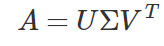


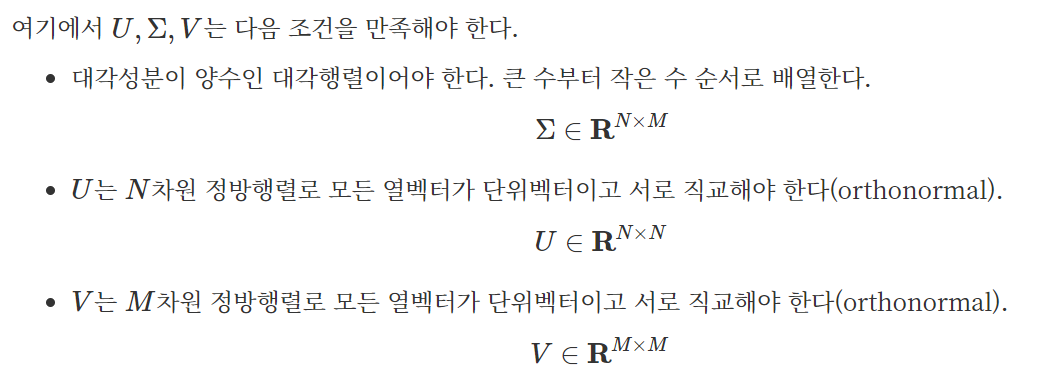

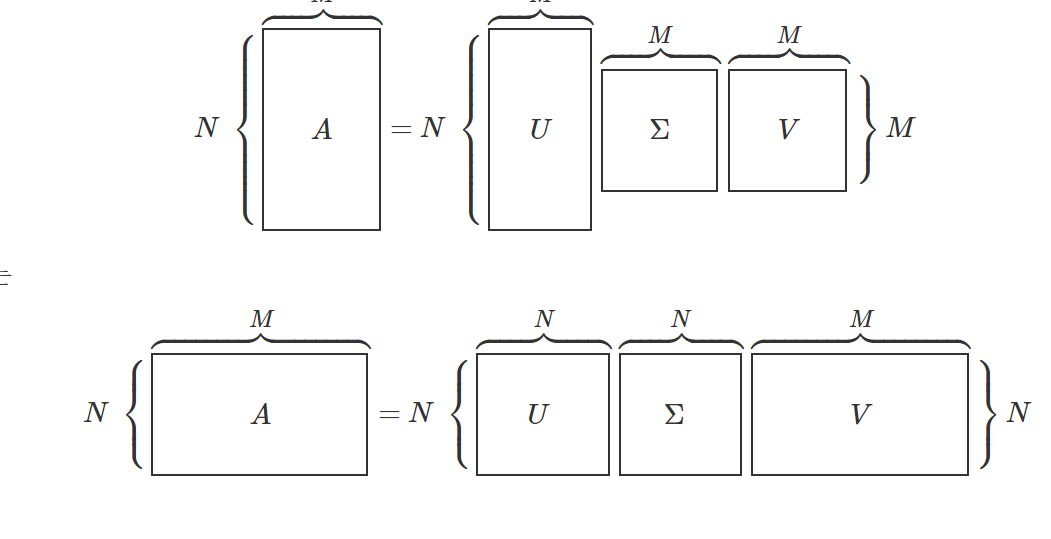

In [25]:
from numpy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
import numpy as np
m = np.matrix([[1, 0, 0], 
               [1, 1, 0], 
               [0, 0, 1]])
u, s, v = np.linalg.svd(m)

In [5]:
u

matrix([[-0.52573111,  0.        , -0.85065081],
        [-0.85065081,  0.        ,  0.52573111],
        [ 0.        ,  1.        ,  0.        ]])

In [6]:
s


array([1.61803399, 1.        , 0.61803399])

In [7]:
v

matrix([[-0.85065081, -0.52573111, -0.        ],
        [ 0.        ,  0.        ,  1.        ],
        [-0.52573111,  0.85065081,  0.        ]])

In [9]:
A = np.array([[3, -1], [1, 3], [1, 1]])
U, S, VT = svd(A)

U

array([[-4.08248290e-01,  8.94427191e-01, -1.82574186e-01],
       [-8.16496581e-01, -4.47213595e-01, -3.65148372e-01],
       [-4.08248290e-01, -1.94289029e-16,  9.12870929e-01]])

In [10]:
s

array([1.61803399, 1.        , 0.61803399])

In [11]:
v

matrix([[-0.85065081, -0.52573111, -0.        ],
        [ 0.        ,  0.        ,  1.        ],
        [-0.52573111,  0.85065081,  0.        ]])

In [12]:
np.diag(S, 1)[:, 1:]

array([[3.46410162, 0.        ],
       [0.        , 3.16227766],
       [0.        , 0.        ]])

In [13]:
VT

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [14]:
U @ np.diag(S, 1)[:, 1:] @ VT

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

축소형을 구하려면 인수 full_matrices=False로 지정한다.

In [15]:
U2, S2, VT2 = svd(A, full_matrices=False)

In [16]:
S2

array([3.46410162, 3.16227766])

In [17]:
U2

array([[-4.08248290e-01,  8.94427191e-01],
       [-8.16496581e-01, -4.47213595e-01],
       [-4.08248290e-01, -1.94289029e-16]])

In [18]:
VT2

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [19]:
U2 @ np.diag(S2) @ VT2

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

1차원 근사<br>
2차원 평면 위에 3개의 2차원 벡터  a1,a2,a3 가 있다. 원점을 지나면서 모든 점들과 가능한 한 가까이 있는 직선을 만들고 싶다면 직선의 방향을 어떻게 해야 할까? 직선의 방향을 나타내는 단위 벡터를  w 라고 하자.


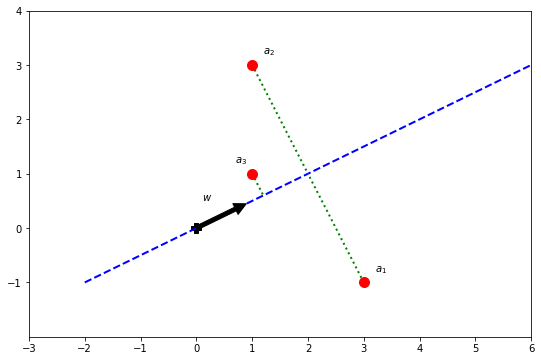

In [26]:
w = np.array([2, 1]) / np.sqrt(5)
a1 = np.array([3, -1])
a2 = np.array([1, 3])
a3 = np.array([1, 1])

black = {"facecolor": "black"}

plt.figure(figsize=(9, 6))
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=black)
plt.plot([-2, 8], [-1, 4], 'b--', lw=2)
plt.plot([a1[0], 2], [a1[1], 1], 'g:', lw=2)
plt.plot([a2[0], 2], [a2[1], 1], 'g:', lw=2)
plt.plot([a3[0], 1.2], [a3[1], 0.6], 'g:', lw=2)
plt.plot(a1[0], a1[1], 'ro', ms=10)
plt.plot(a2[0], a2[1], 'ro', ms=10)
plt.plot(a3[0], a3[1], 'ro', ms=10)
plt.text(0.1, 0.5, "$w$")
plt.text(a1[0] + 0.2, a1[1] + 0.2, "$a_1$")
plt.text(a2[0] + 0.2, a2[1] + 0.2, "$a_2$")
plt.text(a3[0] - 0.3, a3[1] + 0.2, "$a_3$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 6)
plt.ylim(-2, 4)
plt.show()